Bubble diagram / dynamic relaxation



In [66]:
# import needed library's
import pandas as pd
import numpy as np
import networkx as nx

In [139]:
#inputs

#number of specific function
num_shop = 4
num_square = 2
num_workshop = num_shop // 2
num_storage = num_shop

#create a list with all of the names of all the functions
functions = ["square"] * num_square + ["shop"] * num_shop + ["storage"] * num_storage + ["workshop"] * num_workshop
#calculate the total number of functions
num_functions = len(functions)
print("Total number of functions:",num_functions)

#m2
area = {
"shop" : 30,
"square" : 2500,
"workshop" : 60,
"storage" : 10
}

Total number of functions: 12


In [134]:
#make a table with all the data regarding the functions

last_function = ""
i = 0
function_data = []
for func in functions:
    if last_function != func:
        i = 0
    function_data.append([func, i, area[func]])
    last_function = func
    i += 1

pd.DataFrame(function_data, columns=["function_name", "space_index", "area"])

,function_name,space_index,area
0,square,0,2500
1,square,1,2500
2,shop,0,30
3,shop,1,30
4,shop,2,30
5,shop,3,30
6,storage,0,10
7,storage,1,10
8,storage,2,10
9,storage,3,10


In [135]:
#create a list to store all of the connections
con = []
point = []

#make the node list without other information
for m in range(num_functions):
    point.append(m)

#create some empty lists to keep track of items that are already used
used_shops = []
used_storage = []
used_workshop = []
#calculate the number of shops per square
shop_persquare = num_shop // num_square

#find all of the  connections
for b in range(num_functions):
    sh_sq = 0
    if function_data[b][0] == 'square':
        for l in range(num_functions):
            if function_data[l][0] == 'shop':
                if l not in used_shops:
                    if sh_sq < shop_persquare:
                        con.append((b,l))
                        used_shops.append(l)
                        sh_sq += 1
            if function_data[l][0] == 'square':
                if (b,l) not in con and (l,b) not in con and b != l:
                    con.append((b,l))
    st_sh = 0
    sh_ws = 0
    if function_data[b][0] == 'shop':
        for i in range(num_functions):
            if function_data[i][0] == 'storage':
                if st_sh < 1:
                    if i not in used_storage and b != i:
                        con.append((b,i))
                        used_storage.append(i)
                        st_sh = 1
            if function_data[i][0] == 'workshop':
                if sh_ws < 1:
                    if i not in used_workshop and b != i:
                        con.append((b,i))
                        used_workshop.append(i)
                        sh_ws = 1

#check the connectiosn visualy
print(con)
print(point)


[(0, 1), (0, 2), (0, 3), (1, 4), (1, 5), (2, 6), (2, 10), (3, 7), (3, 11), (4, 8), (5, 9)]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [136]:
#shervins piece of code from the workshop

G = nx.Graph()
G.add_nodes_from(point)
G.add_edges_from(con)

#find the size of the connection matrix
Matrix_size = (num_functions, num_functions)
# Make the empty connection matrix
Con_matrix = np.zeros(Matrix_size, dtype=int)
# iterate over the egdes
for n1, n2 in G_edges:
    # since the graph is undrirected we fill the matrix 
    # on both side of the diagonal line
    # moeten nog kijken naar hoe we de kracht van de veer hier al in kunnen verwerken
    Con_matrix[n1, n2] = 1 
    Con_matrix[n2, n1] = 1

# display as pandas dataframe
display(pd.DataFrame(Con_matrix))

,0,1,2,3,4,5,6,7,8,9,10,11
0,0,0,0,0,1,0,1,0,1,0,0,0
1,0,0,0,0,0,1,0,1,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,0,1
4,1,0,1,0,0,1,0,0,0,0,0,0
5,0,1,0,1,1,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,0,0


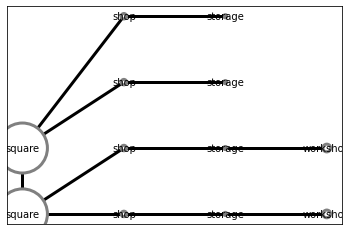

In [137]:
#give all of the nodes a position
positions = {}

last_function = ""
r = 0
x_pos = 0
y_pos = 0

for func in functions:
    if last_function != func:
        x_pos = x_pos+500
        y_pos = 0
    positions[r] = (x_pos,y_pos)
    last_function = func
    r += 1
    y_pos = y_pos+500


#make a dictonary with labels for all of the functions
labels = {}
for w in range(num_functions):
    labels[w] = function_data[w][0]

#give all the nodes the correct size
function_area = []
for name in functions:
    function_area.append(area[name])

#select the options for the graph
options = {
    "font_size": 10,
    "node_size": function_area,
    "node_color": "white",
    "edgecolors": "grey",
    "edge_color": "black",
    "linewidths": 3,
    "width": 3,
    "labels": labels,
}

#print the graph
nx.draw_networkx(G, positions, with_labels=True, **options)